In [1]:
# General imports
import numpy as np
from pprint import pprint

# Sklearn imports
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import hinge_loss
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, precision_recall_curve
from sklearn.metrics import precision_score, recall_score, classification_report
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_predict, cross_validate, GridSearchCV

# Graph Plots
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import ssl
import urllib.request

ssl._create_default_https_context = ssl._create_unverified_context

urllib.request.install_opener(
    urllib.request.build_opener(
        urllib.request.HTTPSHandler(context=ssl._create_default_https_context())
    )
)

X, y = fetch_openml('mnist_784', version=1, as_frame=True, return_X_y=True)

In [3]:
X = X.to_numpy()
y = y.to_numpy()

In [4]:
target_names = np.unique(y)

print('Number of samples: {0} , type: {1}'.format(X.shape[0], X.dtype))
print('Number of features: {0}'.format(X.shape[1]))
print('Minimum: {0}, Maximum: {1}'.format(np.min(X), np.max(X)))
print('Number of classes: {0}, type: {1}'.format(len(target_names), y.dtype))
print('Labels: {0}', target_names)

Number of samples: 70000 , type: int64
Number of features: 784
Minimum: 0, Maximum: 255
Number of classes: 10, type: object
Labels: {0} ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


In [5]:
X = MinMaxScaler().fit_transform(X)
print('Minimum: {0}, Maximum: {1}'.format(np.min(X), np.max(X)))

Minimum: 0.0, Maximum: 1.0


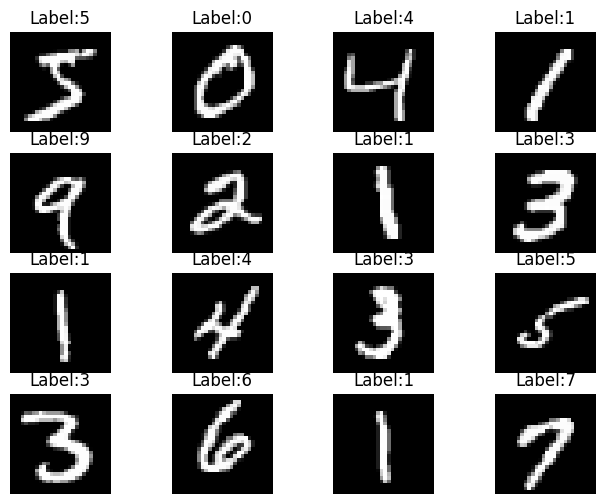

In [6]:
num_images = 20
factor = int(np.sqrt(num_images))
fig, ax = plt.subplots(nrows=factor, ncols=factor, figsize=(8, 6))
idx_offset = 0
for i in range(factor):
    index = idx_offset + i * factor
    for j in range(factor):
        ax[i, j].imshow(X[index+j].reshape(28, 28), cmap='gray')
        ax[i, j].set_title('Label:{0}'.format(str(y[index+j])))
        ax[i, j].set_axis_off()

In [7]:
x_train, x_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

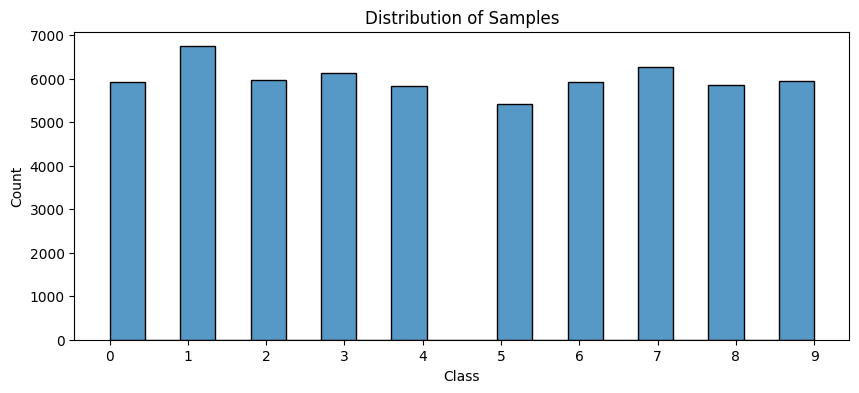

In [8]:
plt.figure(figsize=(10, 4))
sns.histplot(data=np.int8(y_train), binwidth=0.45, bins=11)
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9], labels=[0,1,2,3,4,5,6,7,8,9])
plt.xlabel('Class')
plt.title('Distribution of Samples')
plt.show()

## Binary Classifier

In [9]:
y_train_0 = -1 * np.ones((len(y_train)))
y_test_0 = -1 * np.ones((len(y_test)))

indx_0 = np.where(y_train=='0')

y_train_0[indx_0] = 1
indx_0 = np.where(y_test == '0')
y_test_0[indx_0] = 1

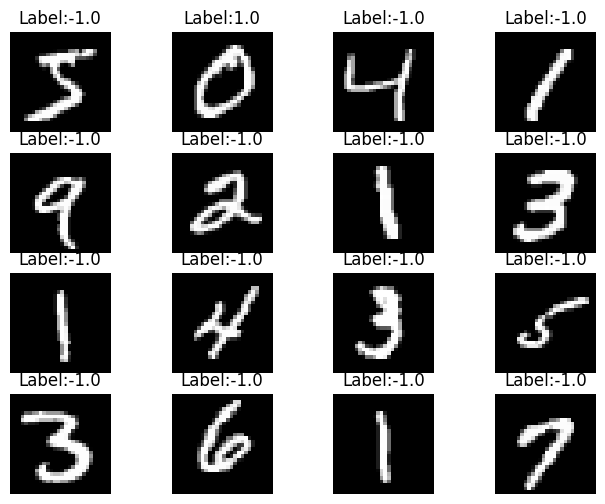

In [10]:
num_images = 20
factor = int(np.sqrt(num_images))
fig, ax = plt.subplots(nrows=factor, ncols=factor, figsize=(8, 6))
idx_offset = 0
for i in range(factor):
    index = idx_offset + i * factor
    for j in range(factor):
        ax[i, j].imshow(X[index+j].reshape(28, 28), cmap='gray')
        ax[i, j].set_title('Label:{0}'.format(str(y_train_0[index+j])))
        ax[i, j].set_axis_off()

## Baseline Model

In [11]:
num_pos = len(np.where(y_train_0==1)[0])
num_neg = len(np.where(y_train_0==-1)[0])
print(num_pos, num_neg)

5923 54077


In [12]:
base_model = DummyClassifier(strategy='most_frequent')

In [13]:
base_model.fit(x_train, y_train_0)

DummyClassifier(strategy='most_frequent')

In [14]:
print('Training Accuracy : {0:.2f}'.format(base_model.score(x_train, y_train_0)))
print('Testing Accuracy : {0:.2f}'.format(base_model.score(x_test, y_test_0)))

Training Accuracy : 0.90
Testing Accuracy : 0.90


## Perceptron Model

In [15]:
perceptron = Perceptron(max_iter=100, random_state=1729)

In [16]:
perceptron.fit(x_train, y_train_0)

Perceptron(max_iter=100, random_state=1729)

In [17]:
print('Dimensions of weights w : {0}'.format(perceptron.coef_.shape))
print('Bias : {0}'.format(perceptron.intercept_))

Dimensions of weights w : (1, 784)
Bias : [-108.]


In [18]:
print('Training Accuracy : {0}'.format(perceptron.score(x_train, y_train_0)))
print('Testing Accuracy: {0}'.format(perceptron.score(x_test, y_test_0)))

Training Accuracy : 0.99095
Testing Accuracy: 0.989


## Confusion Matrix

In [19]:
y_hat_train_0 = perceptron.predict(x_train)

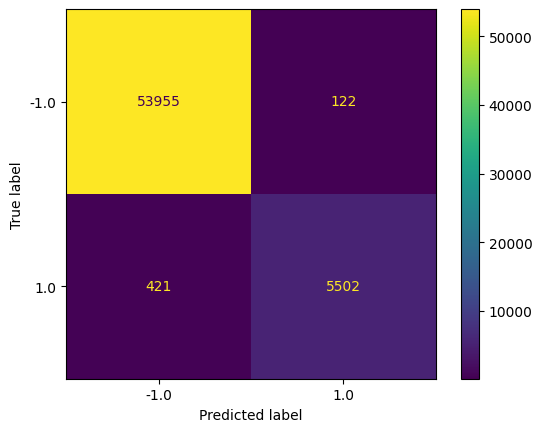

In [20]:
cm_display = ConfusionMatrixDisplay.from_predictions(y_train_0, y_hat_train_0, values_format='.5g')
plt.show()

In [21]:
cf_matrix = cm_display.confusion_matrix

In [22]:
tn = cf_matrix[0,0]
fn = cf_matrix[1,0]
fp = cf_matrix[0,1]
tp = cf_matrix[1,1]

In [23]:
precision = tp/(tp+fp)
print(precision)

0.9783072546230441


In [24]:
recall = tp/(tp+fn)
print(recall)

0.9289211548201924


In [25]:
accuracy = (tp+tn)/(tp+tn+fp+fn)
print(accuracy)

0.99095


## Cross Validation

In [26]:
perceptron_cv = Perceptron(max_iter=100, random_state=1729)
scores = cross_validate(perceptron_cv, x_train, y_train_0, cv=5, scoring=['precision','recall','f1'], return_estimator=True)
pprint(scores)

{'estimator': [Perceptron(max_iter=100, random_state=1729),
               Perceptron(max_iter=100, random_state=1729),
               Perceptron(max_iter=100, random_state=1729),
               Perceptron(max_iter=100, random_state=1729),
               Perceptron(max_iter=100, random_state=1729)],
 'fit_time': array([0.52139592, 1.0546279 , 0.72365093, 0.64907479, 0.88040686]),
 'score_time': array([0.02181721, 0.01196694, 0.00816798, 0.0081749 , 0.00769401]),
 'test_f1': array([0.95238095, 0.91666667, 0.94915254, 0.94117647, 0.95091763]),
 'test_precision': array([0.95890411, 0.98828125, 0.95319149, 0.95090439, 0.96200345]),
 'test_recall': array([0.94594595, 0.85472973, 0.94514768, 0.93164557, 0.94008439])}


In [27]:
print('f1, avg:{0:.2f}, std:{1:.3f}'.format(scores['test_f1'].mean(), scores['test_f1'].std()))
print('precision, avg:{0:.2f}, std:{1:.3f}'.format(scores['test_precision'].mean(), scores['test_precision'].std()))
print('recall, avg:{0:.2f}, std:{1:.3f}'.format(scores['test_recall'].mean(), scores['test_recall'].std()))

f1, avg:0.94, std:0.013
precision, avg:0.96, std:0.013
recall, avg:0.92, std:0.035


In [28]:
print(classification_report(y_train_0, y_hat_train_0))

              precision    recall  f1-score   support

        -1.0       0.99      1.00      0.99     54077
         1.0       0.98      0.93      0.95      5923

    accuracy                           0.99     60000
   macro avg       0.99      0.96      0.97     60000
weighted avg       0.99      0.99      0.99     60000



In [30]:
from sklearn.preprocessing import LabelBinarizer

In [32]:
y_train_ovr = LabelBinarizer().fit_transform(y_train)
for i in range(10):
    print('{0}:{1}'.format(y_train[i], y_train_ovr[i]))

5:[0 0 0 0 0 1 0 0 0 0]
0:[1 0 0 0 0 0 0 0 0 0]
4:[0 0 0 0 1 0 0 0 0 0]
1:[0 1 0 0 0 0 0 0 0 0]
9:[0 0 0 0 0 0 0 0 0 1]
2:[0 0 1 0 0 0 0 0 0 0]
1:[0 1 0 0 0 0 0 0 0 0]
3:[0 0 0 1 0 0 0 0 0 0]
1:[0 1 0 0 0 0 0 0 0 0]
4:[0 0 0 0 1 0 0 0 0 0]


In [33]:
perceptron = Perceptron(random_state=1729)

In [34]:
perceptron.fit(x_train, y_train)

Perceptron(random_state=1729)

In [35]:
print('Shape of weight matrix:{0} and bias vector:{1}'.format(perceptron.coef_.shape, perceptron.intercept_.shape))

Shape of weight matrix:(10, 784) and bias vector:(10,)


In [36]:
scores = perceptron.decision_function(x_train[6].reshape(1, -1))
print(scores)
print("Predicted class: ", np.argmax(scores))

[[-631.88492118  154.366213    -65.23234141  -90.95338716 -189.29568627
  -137.14385236  -99.64604383 -159.09859285 -136.86391388 -199.26120723]]
Predicted class:  1


In [37]:
print("predicted output: ", perceptron.predict(x_train[0].reshape(1, -1)))

predicted output:  ['5']


In [38]:
y_hat = perceptron.predict(x_train)

In [39]:
print(classification_report(y_train, y_hat))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      5923
           1       0.94      0.98      0.96      6742
           2       0.89      0.90      0.90      5958
           3       0.86      0.87      0.87      6131
           4       0.89      0.94      0.91      5842
           5       0.81      0.88      0.85      5421
           6       0.92      0.97      0.94      5918
           7       0.91      0.94      0.92      6265
           8       0.92      0.77      0.84      5851
           9       0.92      0.82      0.87      5949

    accuracy                           0.90     60000
   macro avg       0.90      0.90      0.90     60000
weighted avg       0.91      0.90      0.90     60000



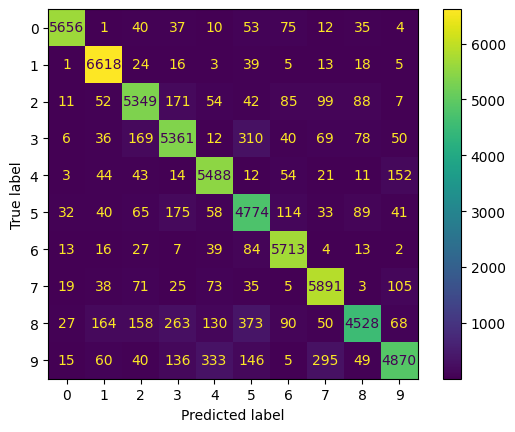

In [40]:
cm_display_multi = ConfusionMatrixDisplay.from_predictions(y_train, y_hat)

## Making a Pipeline

In [41]:
estimators = [('std_scaler', MinMaxScaler()), ('perceptron', Perceptron())]
pipe = Pipeline(estimators)

In [42]:
pipe.fit(x_train, y_train_0)

Pipeline(steps=[('std_scaler', MinMaxScaler()), ('perceptron', Perceptron())])

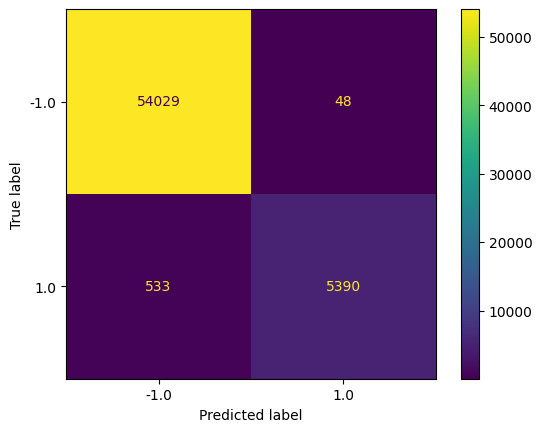

In [43]:
y_hat_train_multi_0 = pipe.predict(x_train)
cm_display_multi_2 = ConfusionMatrixDisplay.from_predictions(y_train_0, y_hat_train_multi_0)
plt.show()